# PA 1: Exploratory Analysis over Dataset_python

## Student Details

Student Name and ID: 

<b>Notes:</b>

When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'dataset_python.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
<b>[2.5 points]</b>

 ## Assignment Details

In this assignment, you will explore, manipulate and play with the data.

You will prepare a report with the following outline for each one of the dataset. Look at the following Example.

1.	Introduction

2.	Retrieving the Data

3.	Glimpse of Data

4.	Check for missing data

5.	Data Exploration

6.  Include a paragraph describing the contribution made by each team member


You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Python, Weka and R. DO Task 1, Task 2, Task 3, Task 4 using Python, Weka, R.
 
**Out of the 3 datasets listed below:**

**1. Dataset_python should be solved using Python in Jupyter notebook only.**

**2. Dataset_Weka using WEKA**

**3. Dataset_R using R**


You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

# Dataset Details

In this assignment, you will work on dataset_python. The columns of the dataset are:

-name - name of the car
-seller - seller type (private or dealer)
-offer type - type of offer for that vehicle 
-price - price of vehicle
-abtest - A/B testing information 
-vehicle type - types of vehicles
-year of registration - which year was the car first registered
-gearbox - type of gear box for vehicle
-powerPS - power output in PS (horsepower)
-model - model of car 
-kilometer - how many kilometers has it driven so far 
-monthof registration - when it was first registered
-fueltype -  petrol/diesel /electricity/lpg etc
-brand - brand name to which it belongs to  
-notRepairedDamage - if there is any damage on the vehicle that has not been repaired yet

## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA.

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
from itertools import chain

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'dataset_python.csv' must be in the same folder as this file.

In [3]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('Dataset_python.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,privat,Angebot,480,test,van,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÃRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


# Task 1: Statistical Exploratory Data Analysis(17.5 points)
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [3]:
#For each task below, look for a Pandas function to do the task.
#Write your code after <code> block

# 2.5 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
#<code>

print(df_data.info())
print('\n')
# 2.5 points
#Task 1-b: Print names of all the brands ('brand' column) used in the dataset. 
#<code>

print(df_data['brand'].unique())
print('\n')
# 2.5 points 
#Task 1-c: print descriptive deatils for "vehicleType" column of the df_data
#<code>
print(df_data['vehicleType'].describe())
print('\n')
# 10 points
#Task 1-d: Some of the entries in the columns are undefined. Determine which columns contain these undefined entries and print the count of these undefined entries for each column respectively.
#<code>

print(df_data[df_data.columns[df_data.isnull().any()]].isnull().sum())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103649 entries, 0 to 103648
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   name                 103649 non-null  object
 1   seller               103649 non-null  object
 2   offerType            103649 non-null  object
 3   price                103649 non-null  int64 
 4   abtest               103649 non-null  object
 5   vehicleType          103649 non-null  object
 6   yearOfRegistration   103649 non-null  int64 
 7   gearbox              98062 non-null   object
 8   powerPS              103649 non-null  int64 
 9   model                97971 non-null   object
 10  kilometer            103649 non-null  int64 
 11  monthOfRegistration  103649 non-null  int64 
 12  fuelType             94287 non-null   object
 13  brand                103649 non-null  object
 14  notRepairedDamage    83595 non-null   object
dtypes: int64(5), object(10)
memory usa

# Task 2: Aggregation & Filtering & Rank (30 points)
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [4]:
# 5 points
# Task 2-a: Find out how many vehicles registered in the year 2018 which has fuel type 'diesel'
#<code>
print(df_data.loc[(df_data['yearOfRegistration'] == 2018) & (df_data['fuelType'].str.contains('diesel'))])

# 10 points
# Task 2-b: Print the records of vehicles whose price is in between 10,000 and 50,000 (excluding these prices) which was registered in the month of april(4)
#<code>
print(df_data.loc[(df_data['price'] > 10000) & (df_data['price'] < 50000) & (df_data['monthOfRegistration'] == 4)]) 


# 5 points
# Task 2-c: Discover the top 5 models with manuell gearbox and print a list of them.
#<code>

res=df_data[df_data['gearbox'] == 'manuell']['model'].value_counts().index[:5]
print(res)
print("\n")


# 10 points
# Task 2-d: Print records of vehicles which sold out with 'Gesuch' offertype with prices lower than 10,000
#<code>

print(df_data.loc[(df_data['price'] < 10000) & (df_data['offerType'].str.contains('Gesuch'))])



                                                     name  seller offerType  \
538                    Mercedes_Benz_E_220_T_CDI_TÃV_neu  privat   Angebot   
919     Seat_Ibiza_1_2_TDI__Reference__5_tuerig__Klima...  privat   Angebot   
1614                              Mercedes_307D_Feuerwehr  privat   Angebot   
2918    BMW_118d_DPF_Leder__Xenon__SH__PDC_TÃV_&_Serv...  privat   Angebot   
3047                               Verkaufe_Golf_V_United  privat   Angebot   
...                                                   ...     ...       ...   
102040                                        Sehr_sauber  privat   Angebot   
102090  Caddy_Maxi_Comfortline_140_PS_AHK_Sitzheizung_...  privat   Angebot   
102540  VW_Volkswagen_caddy_tuning_rotiform_inca_Lkw_Z...  privat   Angebot   
102716           Opel_Vectra_C_2.2_DTI_Irmscher_HU/AU_NEU  privat   Angebot   
103532          Audi_A3_1_9l_TDI_Bose__Navi__8x_Bereifung  privat   Angebot   

        price   abtest vehicleType  yearOfRegistrat

# Task 3: Visualization (30 points)
You will carry out a number of visualization tasks to develop some intuition about the data. Exploration relies heavily on visualization. For plotting, you can use either Matplotlib or Seaborn. It's possible that the default figures produced by Matplotlib might look a bit dull. So, if you want better figures, you might want to try Seaborn. Seaborn features a wide range of styles. Feel free to try them out and pick the one you like. 10 points will be awarded for your visualizations' aesthetics.

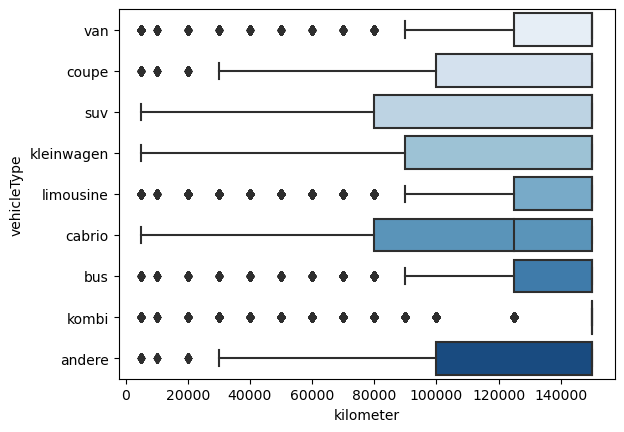

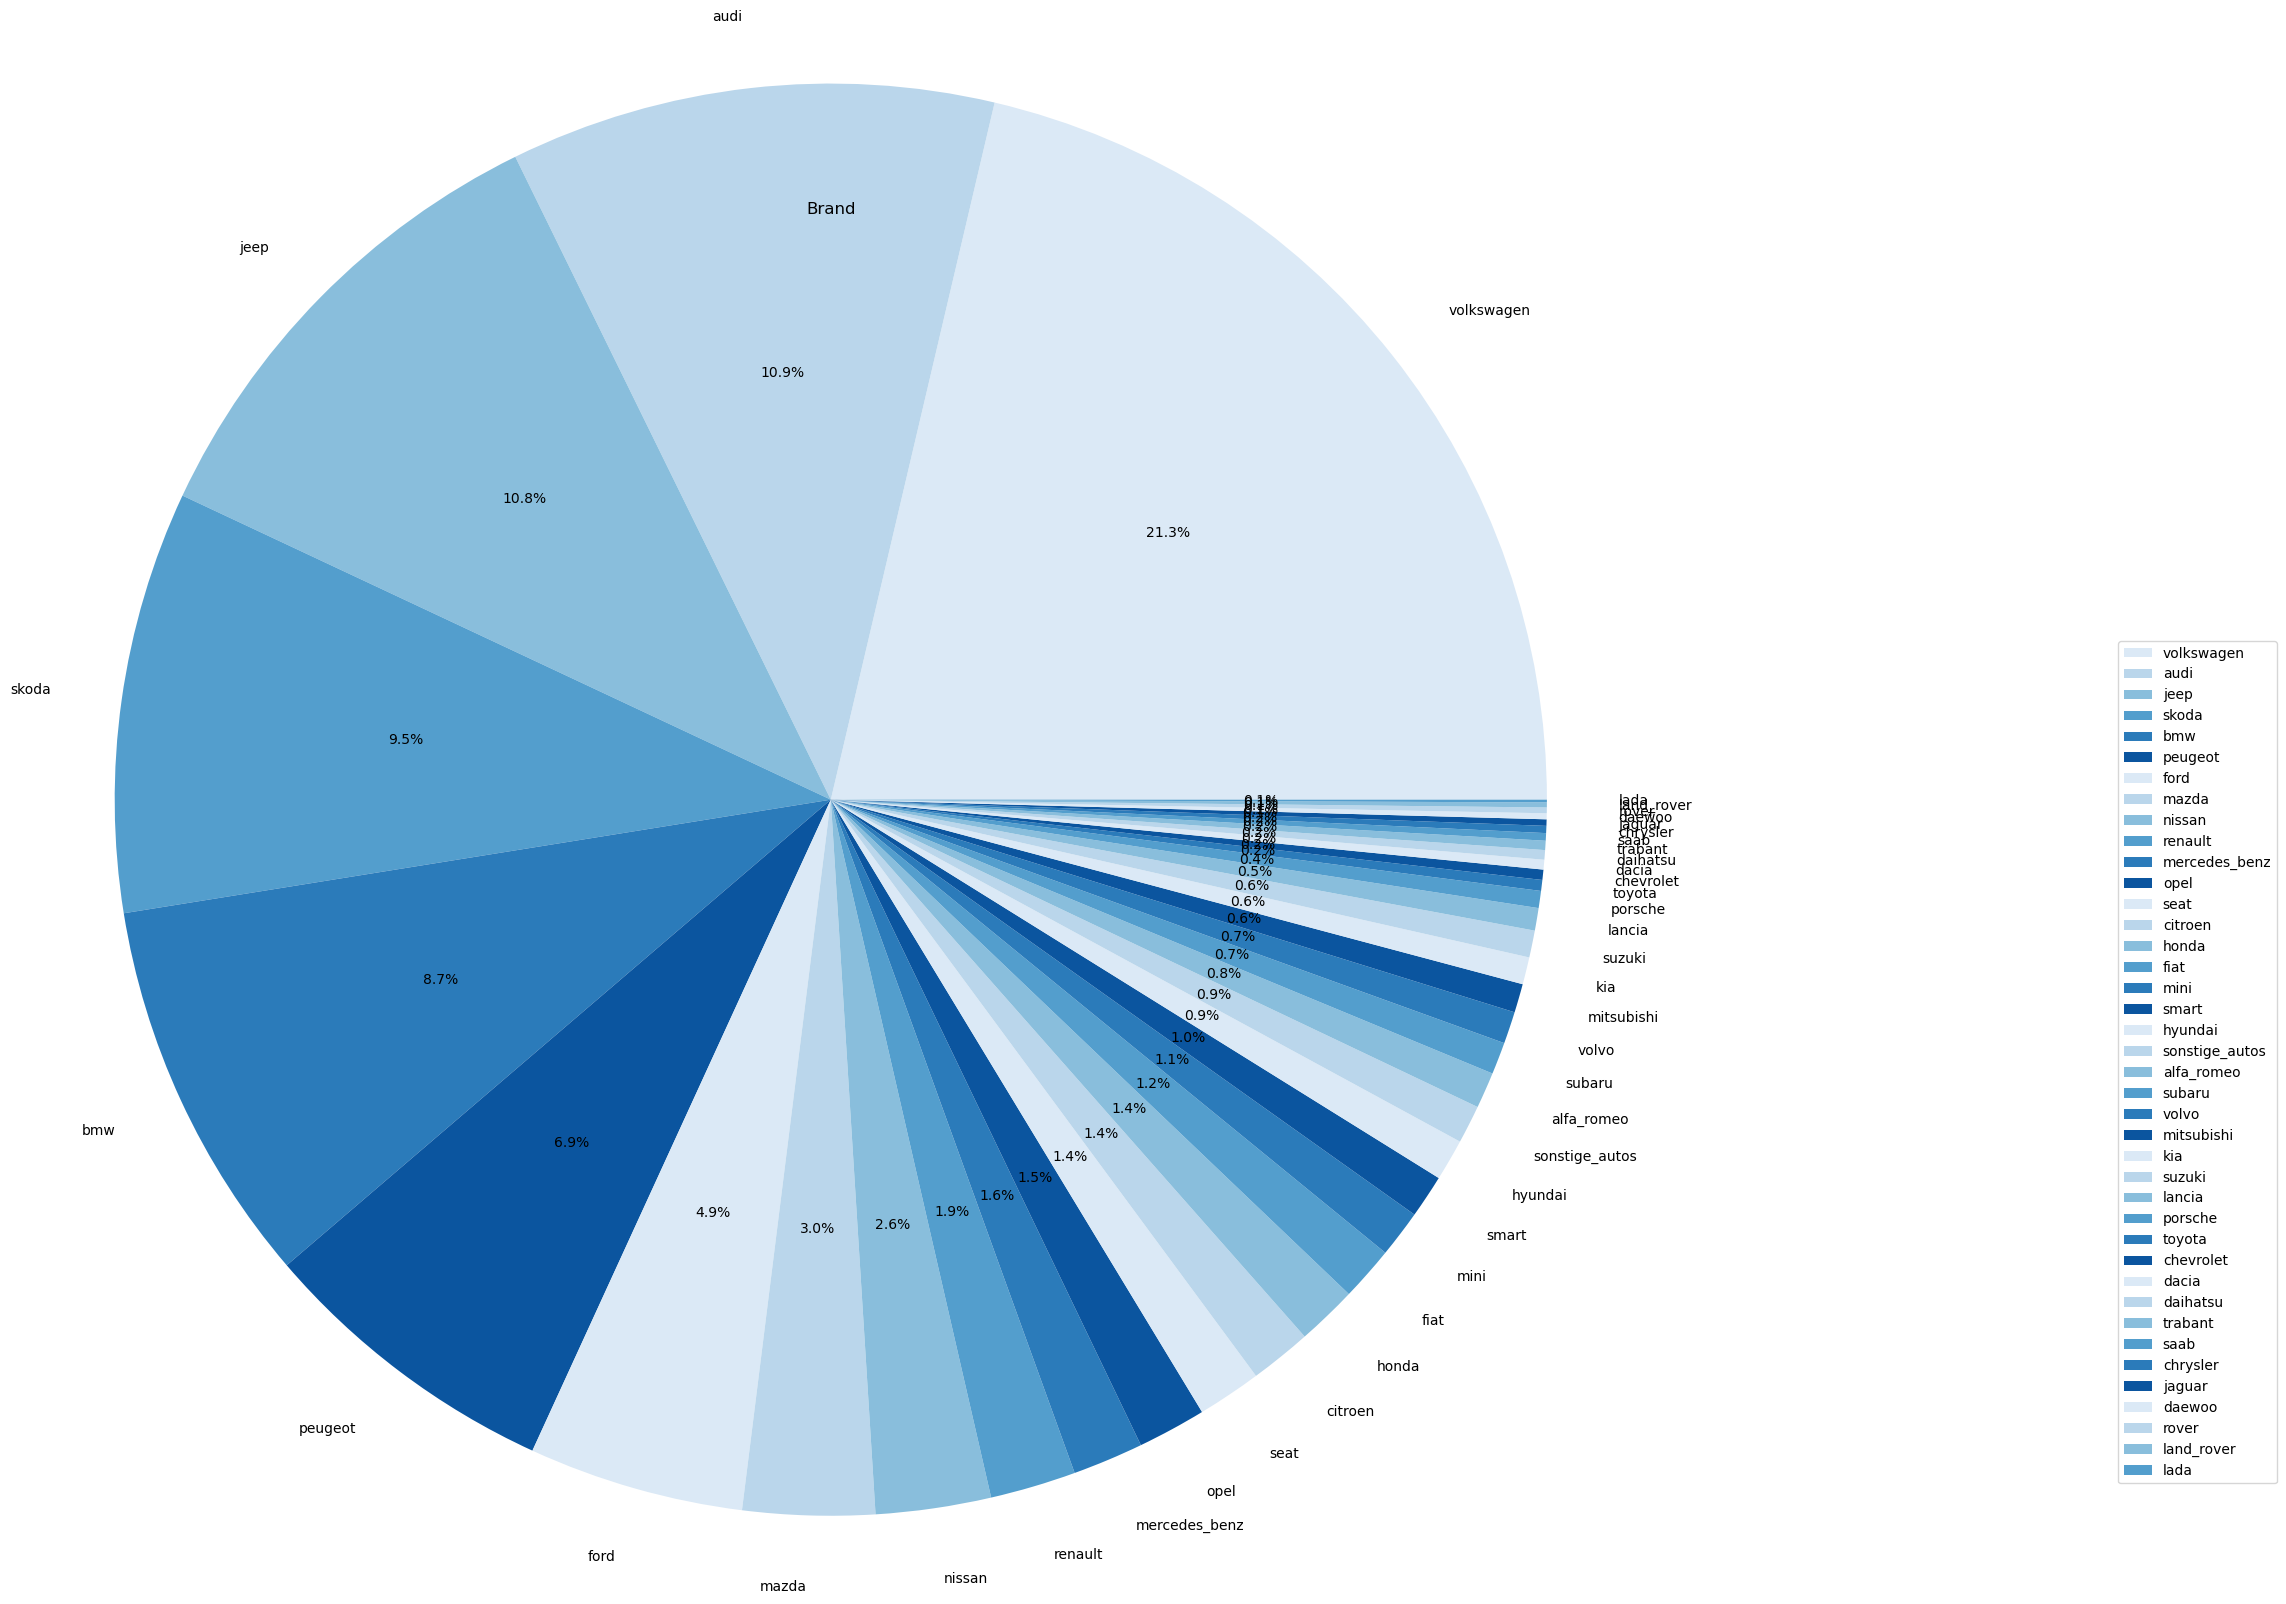

In [5]:
# 10 points
# Task 3-a: Display the boxplot indicating the distance travelled by each type of vehicle

sns.boxplot(x = 'kilometer', y='vehicleType', data = df_data, palette='Blues') 


# 20 points
# Task 3-b: Display a pie chart that represents brands and display percentages and names of brands in legend respectively
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

res=df_data['brand'].value_counts()
palette_color = sns.color_palette('Blues')

fig, ax = plt.subplots(figsize=(15,15), subplot_kw=dict(aspect="equal"))
ax.set_title('Brand')
ax.axis("equal")
pie=ax.pie(res, labels=df_data['brand'].unique(), colors=palette_color, autopct='%1.1f%%', radius=1.55)
ax2 = fig.add_subplot(212)
ax2.axis("off") 
ax2.legend(pie[0],df_data['brand'].unique(), loc="right", bbox_to_anchor = (1.75, 0.6))
plt.show()


#plt.pie(res, labels=df_data['brand'].unique(), colors=palette_color, autopct='%1.1f%%', radius=1. )
#plt.legend()
#plt.show()

# Task 4: Insights from the data (20 points)
Find out 'interesting' information from the dataset. Give two insights and Create a visualization for each of the insights. Explain in a few lines your reasoning. 

Your work's uniqueness and quality will be taken into account when evaluating your work (having a meaningful result and an aesthetic visualization). 

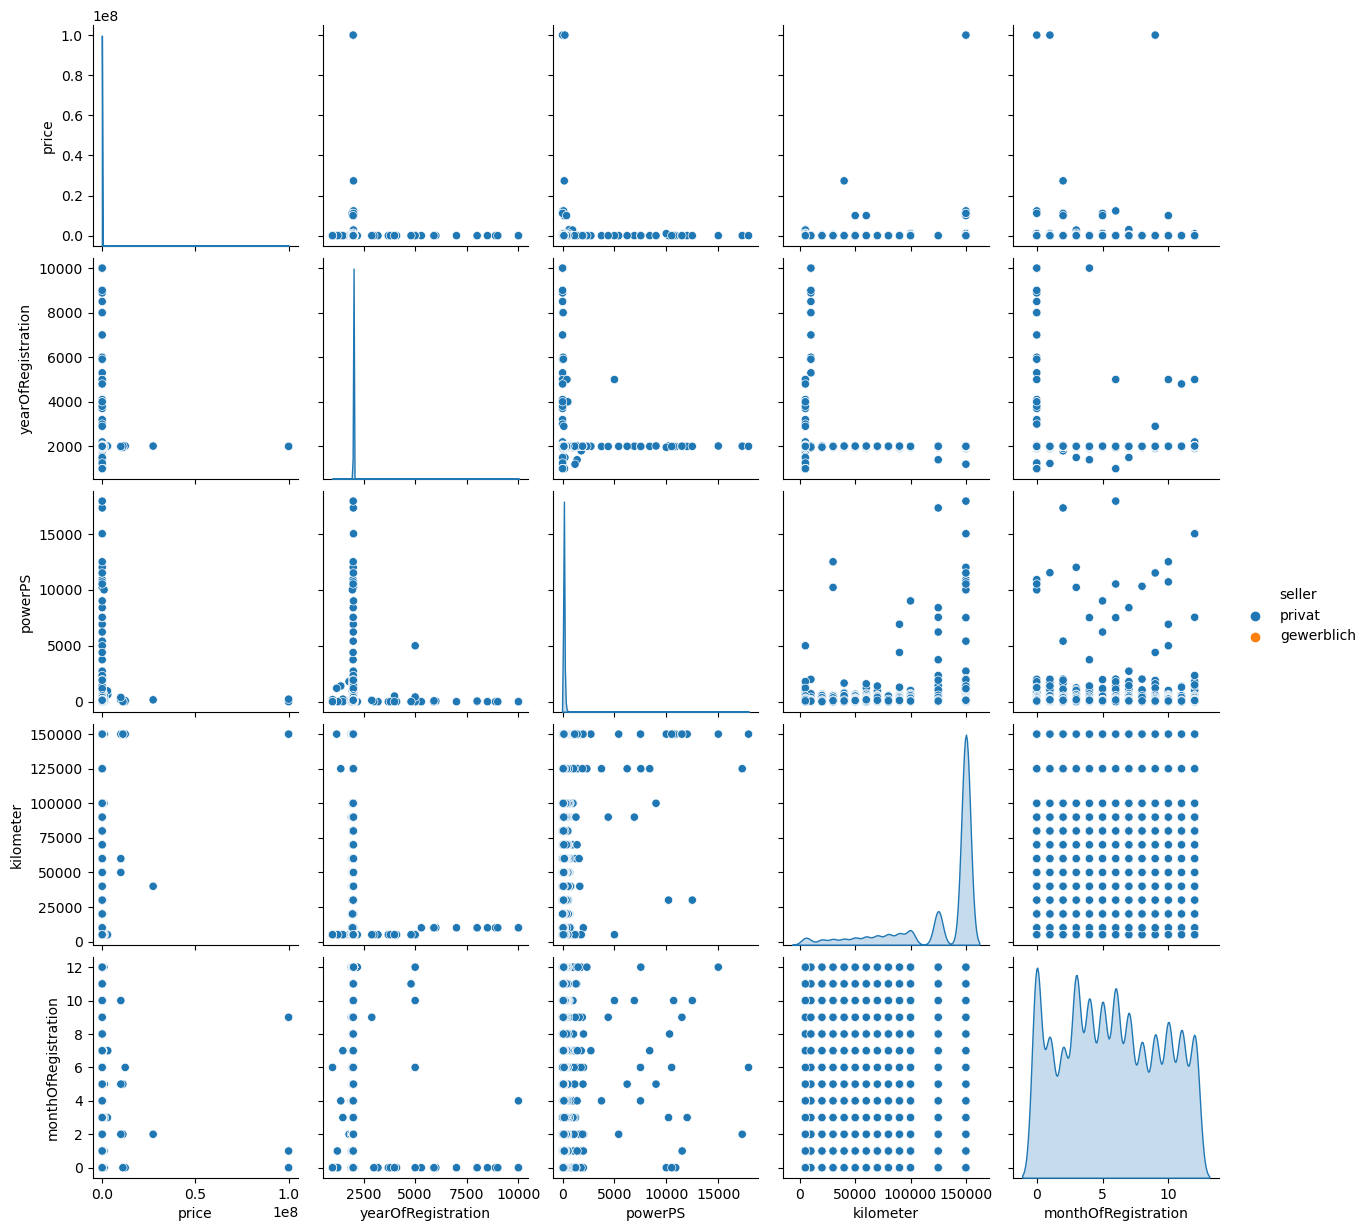

In [6]:
# Code and explaination for Task4
#1. Pair plot with hue seller
sns.pairplot(df_data, hue ='seller')
plt.show()



References:

Contribution: